In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from keras.applications import *
from keras.optimizers import *

In [2]:
Gender = []
Images = []
for i in glob.glob('UTKFace/*.jpg'):
    if os.path.exists(i):
        x = int(i.split('\\')[1].split('_')[0])
        if x >= 0 :
            Gender.append(int(i.split('_')[1]))
            # Images.append('UTKFace/' + i.split('\\')[1])
            Images.append(i)

In [3]:
Gender = np.array(Gender)

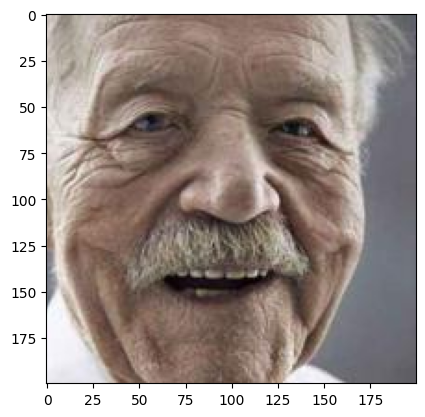

In [77]:
img = cv2.imread(Images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(Images, Gender, train_size=0.90, shuffle=True, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, shuffle=True, random_state=0)

In [6]:
len(x_train), len(x_test), len(x_val)

(19203, 2371, 2134)

In [49]:
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, horizontal_flip=True, fill_mode='nearest', zoom_range= 0.2)
df_train = pd.DataFrame({'filename': x_train, 'gender': y_train})
df_train['gender'] = df_train['gender'].astype('str')
df_train['filename'] = df_train['filename'].astype('str')
train = data_gen.flow_from_dataframe(df_train, x_col='filename', y_col='gender', target_size=(120, 120), batch_size=100, class_mode='binary', color_mode='rgb')

Found 19203 validated image filenames belonging to 2 classes.


In [50]:
df_test = pd.DataFrame({'filename': x_test, 'gender': y_test})
df_test['gender'] = df_test['gender'].astype('str')
df_test['filename'] = df_test['filename'].astype('str')
test = data_gen.flow_from_dataframe(df_test, x_col='filename', y_col='gender', target_size=(120, 120), batch_size=100, class_mode='binary', color_mode='rgb')

Found 2371 validated image filenames belonging to 2 classes.


In [51]:
val_gen = ImageDataGenerator(rescale=1./255)
df_val = pd.DataFrame({'filename': x_val, 'gender': y_val})
df_val['gender'] = df_val['gender'].astype('str')
df_val['filename'] = df_val['filename'].astype('str')
val = val_gen.flow_from_dataframe(df_val, x_col='filename', y_col='gender', target_size=(120, 120), batch_size=100, class_mode='binary', color_mode='rgb')

Found 2134 validated image filenames belonging to 2 classes.


In [52]:
len(train)

193

In [53]:
tf.keras.__version__

'2.10.0'

In [54]:
train[0][0].shape

(100, 120, 120, 3)

In [60]:
conv_base = VGG16(include_top=False, input_shape=(120, 120, 3))
for layer in conv_base.layers[:-4]:
    layer.trainable = False
model1 = Sequential()
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(train, validation_data=val, batch_size=100, epochs=200, 
                     # steps_per_epoch=100, 
                     callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))
model1.summary()

Epoch 1/200
193/193 [==============================] - 77s 392ms/step - loss: 0.5726 - accuracy: 0.7273 - val_loss: 0.3583 - val_accuracy: 0.8440
Epoch 2/200
193/193 [==============================] - 75s 387ms/step - loss: 0.3762 - accuracy: 0.8306 - val_loss: 0.3152 - val_accuracy: 0.8566
Epoch 3/200
193/193 [==============================] - 76s 395ms/step - loss: 0.3317 - accuracy: 0.8552 - val_loss: 0.2774 - val_accuracy: 0.8828
Epoch 4/200
193/193 [==============================] - 76s 391ms/step - loss: 0.3098 - accuracy: 0.8659 - val_loss: 0.2616 - val_accuracy: 0.8927
Epoch 5/200
193/193 [==============================] - 76s 393ms/step - loss: 0.2981 - accuracy: 0.8735 - val_loss: 0.3006 - val_accuracy: 0.8650
Epoch 6/200
193/193 [==============================] - 76s 391ms/step - loss: 0.3056 - accuracy: 0.8676 - val_loss: 0.2642 - val_accuracy: 0.8833
Epoch 7/200
193/193 [==============================] - 76s 393ms/step - loss: 0.2840 - accuracy: 0.8777 - val_loss: 0.2499 -

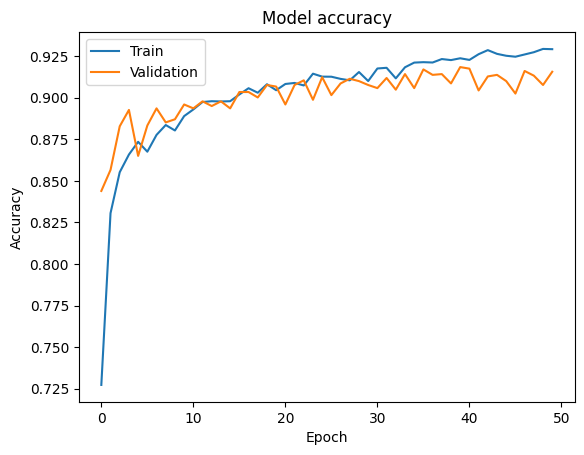

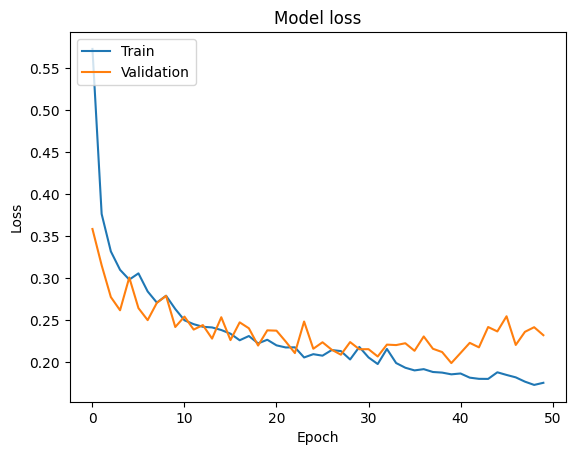

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 23ms/step
Male


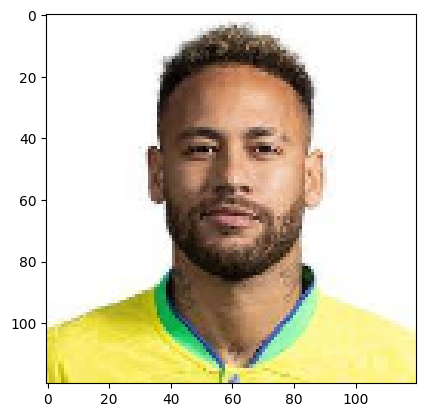

In [71]:
img = cv2.imread(r"C:\Users\user\OneDrive - Delta Academy for Science\Desktop\3.jpg")
img = cv2.resize(img, (120, 120))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = np.array(img)/255
img = img.reshape(1, 120, 120, 3)

if model1.predict(img)[0][0]<=0.5:
    print('Male')
else: 
    print('Female')


In [74]:
print(f'\ntrain: {model1.evaluate(train)}', f'val: {model1.evaluate(val)}', f'test: {model1.evaluate(test)}', sep='\n-------------------------------------------------->\n')

24/24 [==============================] - 44s 2s/step - loss: 0.2183 - accuracy: 0.9148

train: [0.1737406998872757, 0.9295943379402161]
-------------------------------------------------->
val: [0.1988331526517868, 0.9184629917144775]
-------------------------------------------------->
test: [0.21827229857444763, 0.9148038625717163]


In [75]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 120, 120, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 120, 120, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 120, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 60, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 60, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 60, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 30, 128)       0     

In [76]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 120, 120, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 120, 120, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 120, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 60, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 60, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 60, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 30, 128)       0     